# Problem Statements

**Can you accurately predict insurance costs?**

in this project Business want to predict what should be cost offer to customer based on isunsurer details such as

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

%matplotlib inline
%matplotlib notebook

In [3]:
# set seaborn for visualization
sns.set(rc = {'axes.edgecolor': 'white','axes.facecolor': 'white',
             'axes.grid': False,'axes.labelsize': 'medium',
             'figure.facecolor': 'white','font.cursive': ['Apple Chancery'],})

#### Reading Data & Understanding

In [4]:
cost = pd.read_csv(r"C:\Users\hp\Desktop\Star Agile\Machine learning\insurance.csv")

In [5]:
# checking dataset
cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# checking Shape of Data
print('The Number of Rows Dataset contain    : {}'.format(cost.shape[0]))
print('The Number of Columns Dataset contain : {}'.format(cost.shape[1]))

The Number of Rows Dataset contain    : 1338
The Number of Columns Dataset contain : 7


In [7]:
# checking Datatype
print(cost.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [8]:
# checking info about of data
print(cost.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [9]:
# checking duplicate values
print(cost.duplicated().sum())
print()
print('No need to remove duplicate as this could be genuin records')

1

No need to remove duplicate as this could be genuin records


In [10]:
# checking Missing value
print(cost.isnull().sum())
print()
print('There is no missing value in dataset')


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing value in dataset


In [11]:
# checking sub categories are in each feature
a = cost.nunique()
b = cost.dtypes
print(pd.concat({'Number of Unique':a,'Data Type':b}, axis = 1))

          Number of Unique Data Type
age                     47     int64
sex                      2    object
bmi                    548   float64
children                 6     int64
smoker                   2    object
region                   4    object
charges               1337   float64


In [12]:
# checking category and Numerical columns
cat_col = cost.select_dtypes(include='object')
num_col = cost.select_dtypes(exclude='object')

#### Basic EDA

In [13]:
# Analysis Categorical Variable - Uni Variates

def cat01(df,col):
    result = df[col].value_counts()
    print(result)
    print()
    print('Proportion are:')
    Per_result = (df[col].value_counts(normalize=True) * 100).round(2)
    print(Per_result)
    


male      676
female    662
Name: sex, dtype: int64

Proportion are:
male      50.52
female    49.48
Name: sex, dtype: float64

sex


<IPython.core.display.Javascript object>


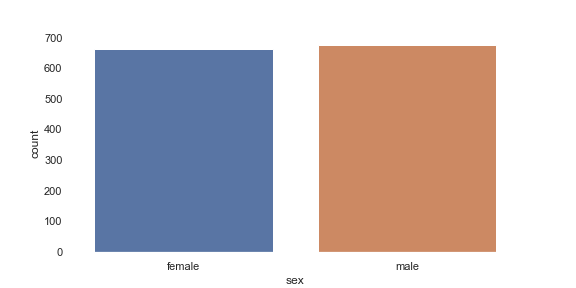

no     1064
yes     274
Name: smoker, dtype: int64

Proportion are:
no     79.52
yes    20.48
Name: smoker, dtype: float64

smoker


<IPython.core.display.Javascript object>


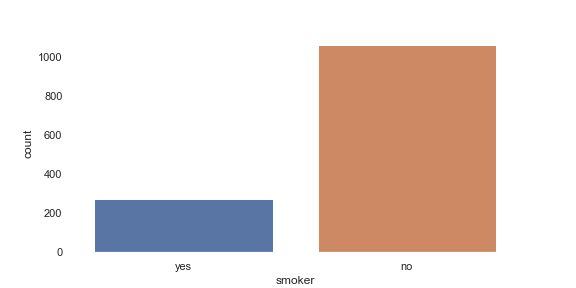

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Proportion are:
southeast    27.20
southwest    24.29
northwest    24.29
northeast    24.22
Name: region, dtype: float64

region


<IPython.core.display.Javascript object>


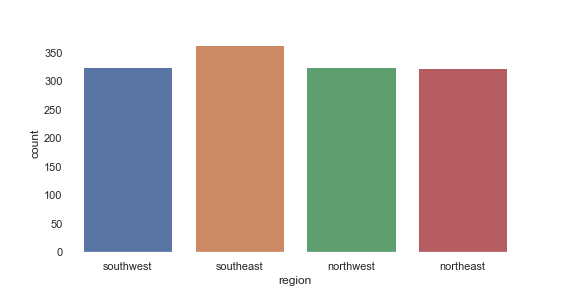

In [14]:
for i in cat_col.columns:
    cat01(cost,i)
    print()
    print(i)
    plt.figure(figsize = (8,4))
    sns.countplot(x = i, data = cost)

In [15]:
# Analysis NUmerical Variable - Uni Variates
def num01(df,col):
    print(col)
    print(df[col].describe().round(2))
    print()
    

age
count    1338.00
mean       39.21
std        14.05
min        18.00
25%        27.00
50%        39.00
75%        51.00
max        64.00
Name: age, dtype: float64



<IPython.core.display.Javascript object>


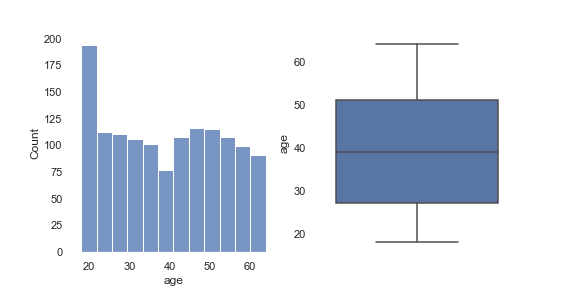

bmi
count    1338.00
mean       30.66
std         6.10
min        15.96
25%        26.30
50%        30.40
75%        34.69
max        53.13
Name: bmi, dtype: float64



<IPython.core.display.Javascript object>


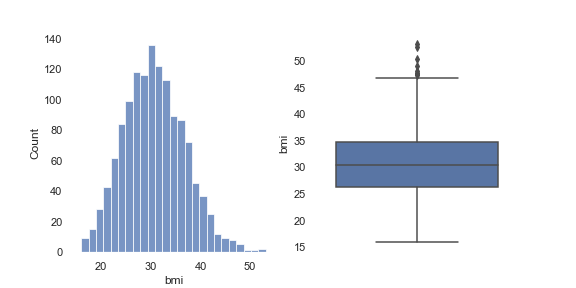

children
count    1338.00
mean        1.09
std         1.21
min         0.00
25%         0.00
50%         1.00
75%         2.00
max         5.00
Name: children, dtype: float64



<IPython.core.display.Javascript object>


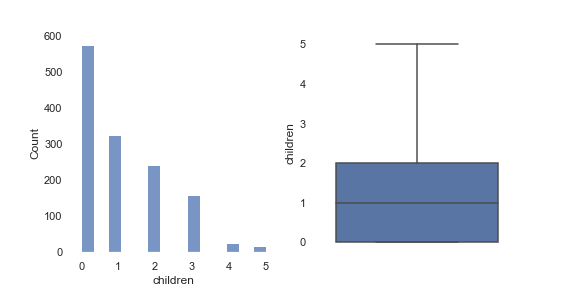

charges
count     1338.00
mean     13270.42
std      12110.01
min       1121.87
25%       4740.29
50%       9382.03
75%      16639.91
max      63770.43
Name: charges, dtype: float64



<IPython.core.display.Javascript object>


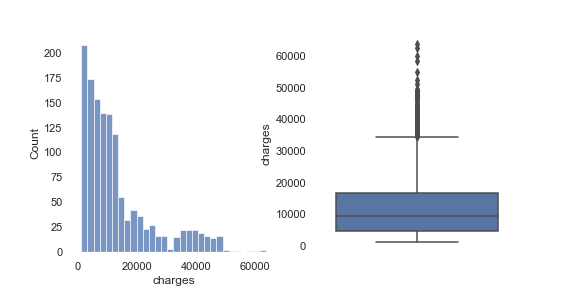

In [16]:
for i in num_col.columns:
    num01(cost, i)
    
    fig, axes = plt.subplots(nrows=1, ncols= 2 , figsize=(8,4))
    sns.histplot(x = i,data = cost, ax = axes[0])
    sns.boxplot(y = i, data = cost, ax = axes[1])

In [17]:
# Bi Variate Analysis

cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<IPython.core.display.Javascript object>


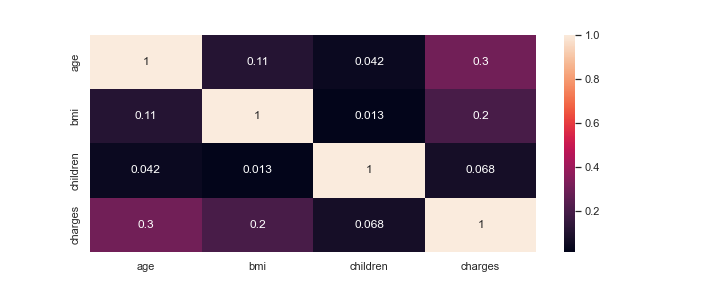

<AxesSubplot:>

In [18]:
plt.figure(figsize = (10,4))
sns.heatmap(cost.corr(), annot=True)

<IPython.core.display.Javascript object>


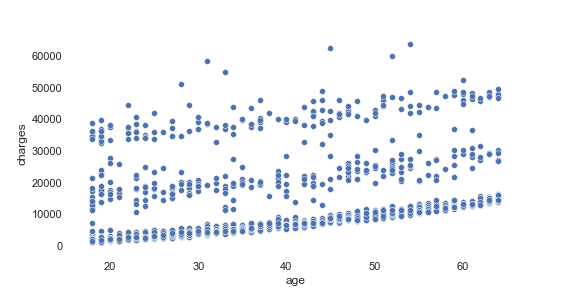

<AxesSubplot:xlabel='age', ylabel='charges'>

In [19]:
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'age', y = 'charges', data = cost)

<IPython.core.display.Javascript object>


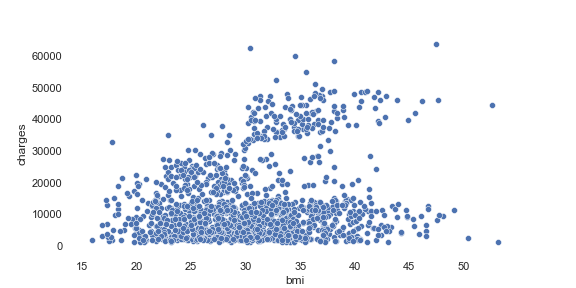

<AxesSubplot:xlabel='bmi', ylabel='charges'>

In [20]:
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'bmi', y = 'charges', data = cost)

In [21]:
cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<IPython.core.display.Javascript object>


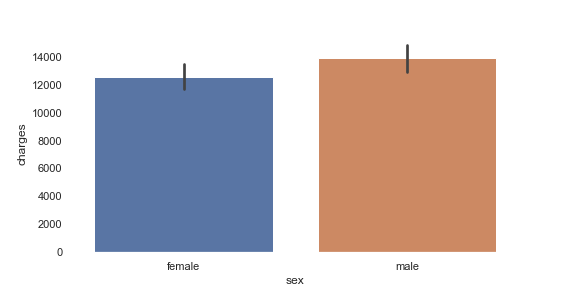

<AxesSubplot:xlabel='sex', ylabel='charges'>

In [22]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'sex', y = 'charges', data = cost)

<IPython.core.display.Javascript object>


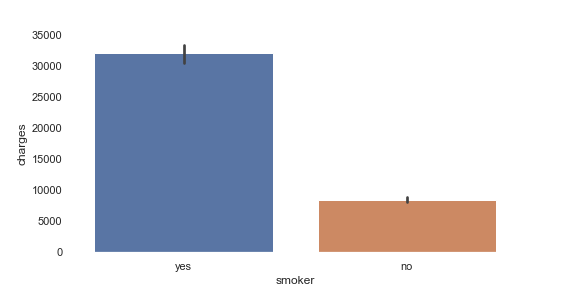

<AxesSubplot:xlabel='smoker', ylabel='charges'>

In [23]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'smoker', y = 'charges', data = cost)

<IPython.core.display.Javascript object>


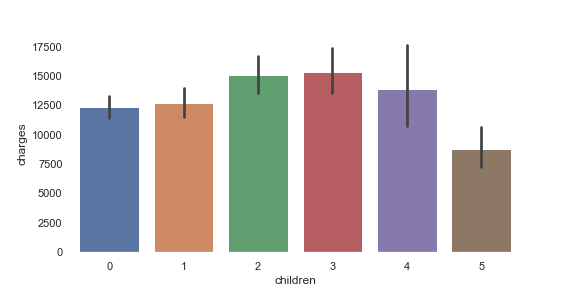

<AxesSubplot:xlabel='children', ylabel='charges'>

In [24]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'children', y = 'charges', data = cost)

<IPython.core.display.Javascript object>


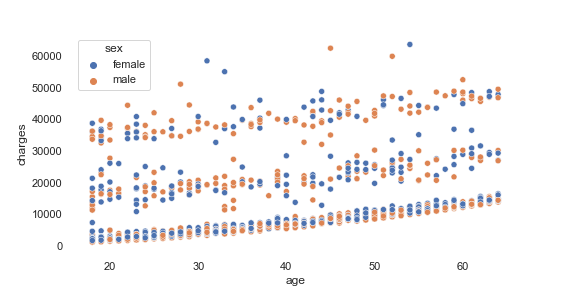

<AxesSubplot:xlabel='age', ylabel='charges'>

In [25]:
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'age', y = 'charges',hue = 'sex', data = cost)

In [26]:
cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
cost['age_bin'] = pd.cut(cost['age'],bins=[0,10,20,30,40,50,60], labels=['0-10','10-20','20-30','30-40','40-50','50-60'])

In [28]:
cost.head()

,age,sex,bmi,children,smoker,region,charges,age_bin
0,19,female,27.900,0,yes,southwest,16884.92400,10-20
1,18,male,33.770,1,no,southeast,1725.55230,10-20
2,28,male,33.000,3,no,southeast,4449.46200,20-30
3,33,male,22.705,0,no,northwest,21984.47061,30-40
4,32,male,28.880,0,no,northwest,3866.85520,30-40


<IPython.core.display.Javascript object>


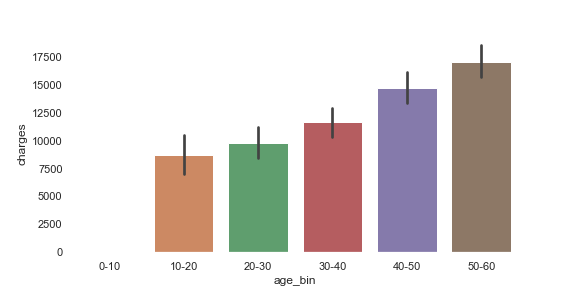

<AxesSubplot:xlabel='age_bin', ylabel='charges'>

In [29]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'age_bin', y = 'charges', data = cost)

Observation:

•	Gender are approx. same in numbers
•	80% of client  are non smoker
•	Client are from all almost equally distributed from all region
•	More client are age of 20 years
•	Most of policy holder does not have children (this is can be trace as 20 years)
•	More client have premium cost less than 20 K
•	There is slight increase in premium as age increase
•	Male and female does not have any impact on policy cost
•	Cost are more for smoker
•	There is avg cost is high for more than 2 children
•	High premium cost for age bucket of 50-60


<IPython.core.display.Javascript object>


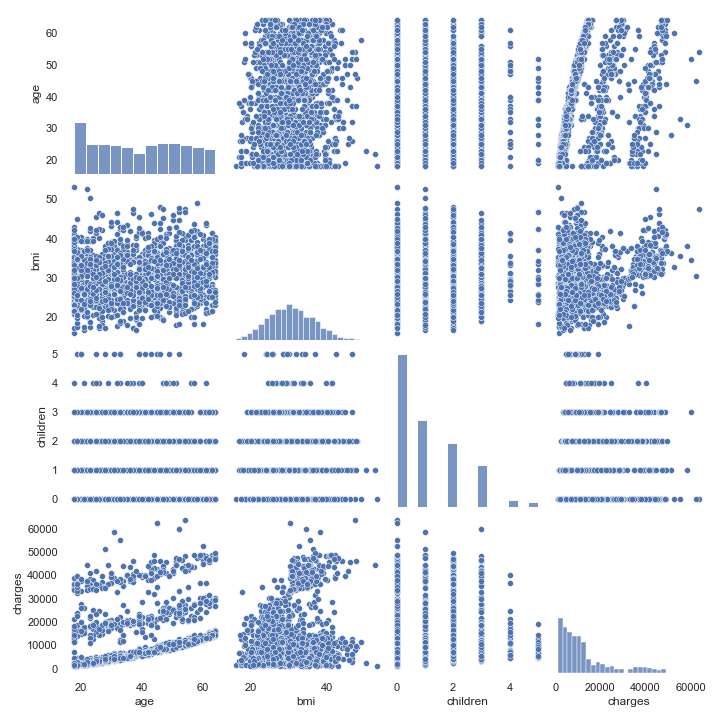

In [30]:

sns.pairplot(cost)

In [31]:
#### Machine learning

In [32]:
cost.head()

,age,sex,bmi,children,smoker,region,charges,age_bin
0,19,female,27.900,0,yes,southwest,16884.92400,10-20
1,18,male,33.770,1,no,southeast,1725.55230,10-20
2,28,male,33.000,3,no,southeast,4449.46200,20-30
3,33,male,22.705,0,no,northwest,21984.47061,30-40
4,32,male,28.880,0,no,northwest,3866.85520,30-40


In [33]:
dummy = pd.get_dummies(cost[['sex','smoker','region']],drop_first = True )

In [34]:
cost = pd.concat([cost,dummy], axis = 1)

In [35]:
cost.drop(columns = ['sex', 'smoker','region'], inplace=True)

In [36]:
cost.head()

,age,bmi,children,charges,age_bin,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,10-20,0,1,0,0,1
1,18,33.770,1,1725.55230,10-20,1,0,0,1,0
2,28,33.000,3,4449.46200,20-30,1,0,0,1,0
3,33,22.705,0,21984.47061,30-40,1,0,1,0,0
4,32,28.880,0,3866.85520,30-40,1,0,1,0,0


In [37]:
dummy1 = pd.get_dummies(cost['age_bin'],drop_first = True )
dummy1

,10-20,20-30,30-40,40-50,50-60
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1333,0,0,0,1,0
1334,1,0,0,0,0
1335,1,0,0,0,0
1336,0,1,0,0,0


In [38]:
cost = pd.concat([cost, dummy1], axis = 1)

In [39]:
cost.drop(columns = ['age_bin'], inplace=True)

In [40]:
cost.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,10-20,20-30,30-40,40-50,50-60
0,19,27.900,0,16884.92400,0,1,0,0,1,1,0,0,0,0
1,18,33.770,1,1725.55230,1,0,0,1,0,1,0,0,0,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,1,0,0,0
3,33,22.705,0,21984.47061,1,0,1,0,0,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,0,0,1,0,0


In [41]:
X = cost.drop(columns =['charges'] )
y = cost['charges']

In [42]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=101)

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1070, 13)
(1070,)
(268, 13)
(268,)


In [44]:
linear_model = LinearRegression()


In [45]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [46]:
test_prediction = linear_model.predict(X_test)
train_prediction = linear_model.predict(X_train)

print('Score of test data  :',r2_score(y_test, test_prediction))
print('Score of train data :',r2_score(y_train, train_prediction))


MSE = mean_squared_error(y_test, test_prediction)
RMSE = np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(y_test, test_prediction)
print('The prediction will out by +- {}'.format(RMSE))
print('Avg Cost is {}'.format(cost['charges'].mean()))

Score of test data  : 0.7642814530344247
Score of train data : 0.7501144795328709
The prediction will out by +- 5767.352984217525
Avg Cost is 13270.422265141257


In [47]:
residual1 = test_prediction - y_test

<IPython.core.display.Javascript object>


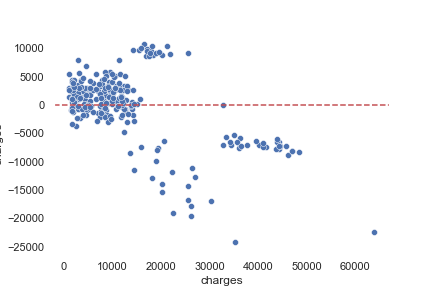

In [48]:
plt.figure()
sns.scatterplot(x = y_test, y = residual1)
plt.axhline(y=0, color='r', linestyle='--')

<IPython.core.display.Javascript object>


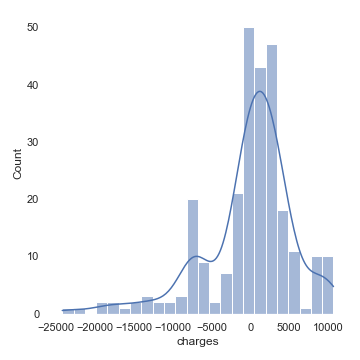

In [49]:

sns.displot(residual1, kde = True)

In [50]:
linear_model.fit(X,y)

LinearRegression()

In [51]:
a = np.array([19,27.9,0,0,1,0,0,1,1,0,0,0,0]).reshape(1,-1)
b = pd.DataFrame(a)
b.shape

(1, 13)

In [52]:
linear_model.predict(b)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25711.47718775])

<IPython.core.display.Javascript object>


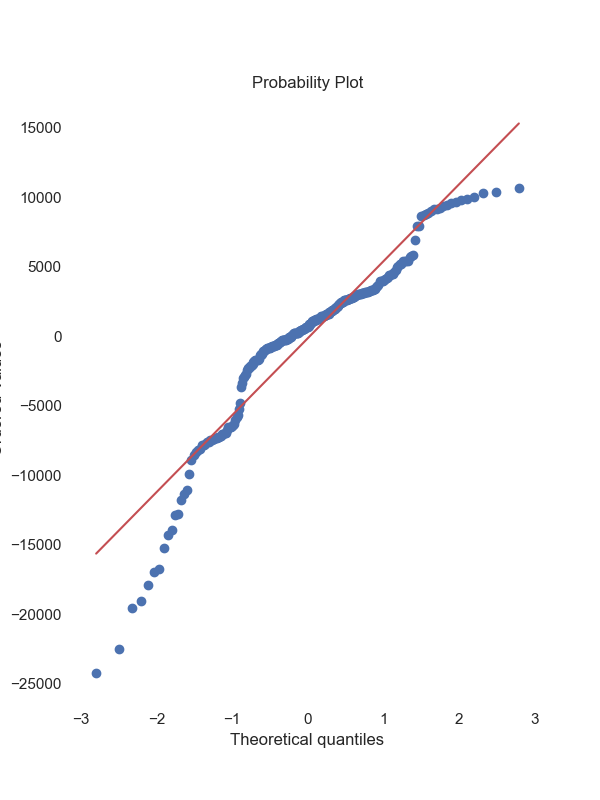

In [55]:
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(residual1, plot=ax)